In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import gaussian_kde, norm, skew, kurtosis

In [10]:
df = pd.read_csv("data.csv", sep=";").rename(columns={"Unnamed: 0": "Name"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    82 non-null     object
 1   2013    82 non-null     object
 2   2024    82 non-null     object
dtypes: object(3)
memory usage: 2.1+ KB


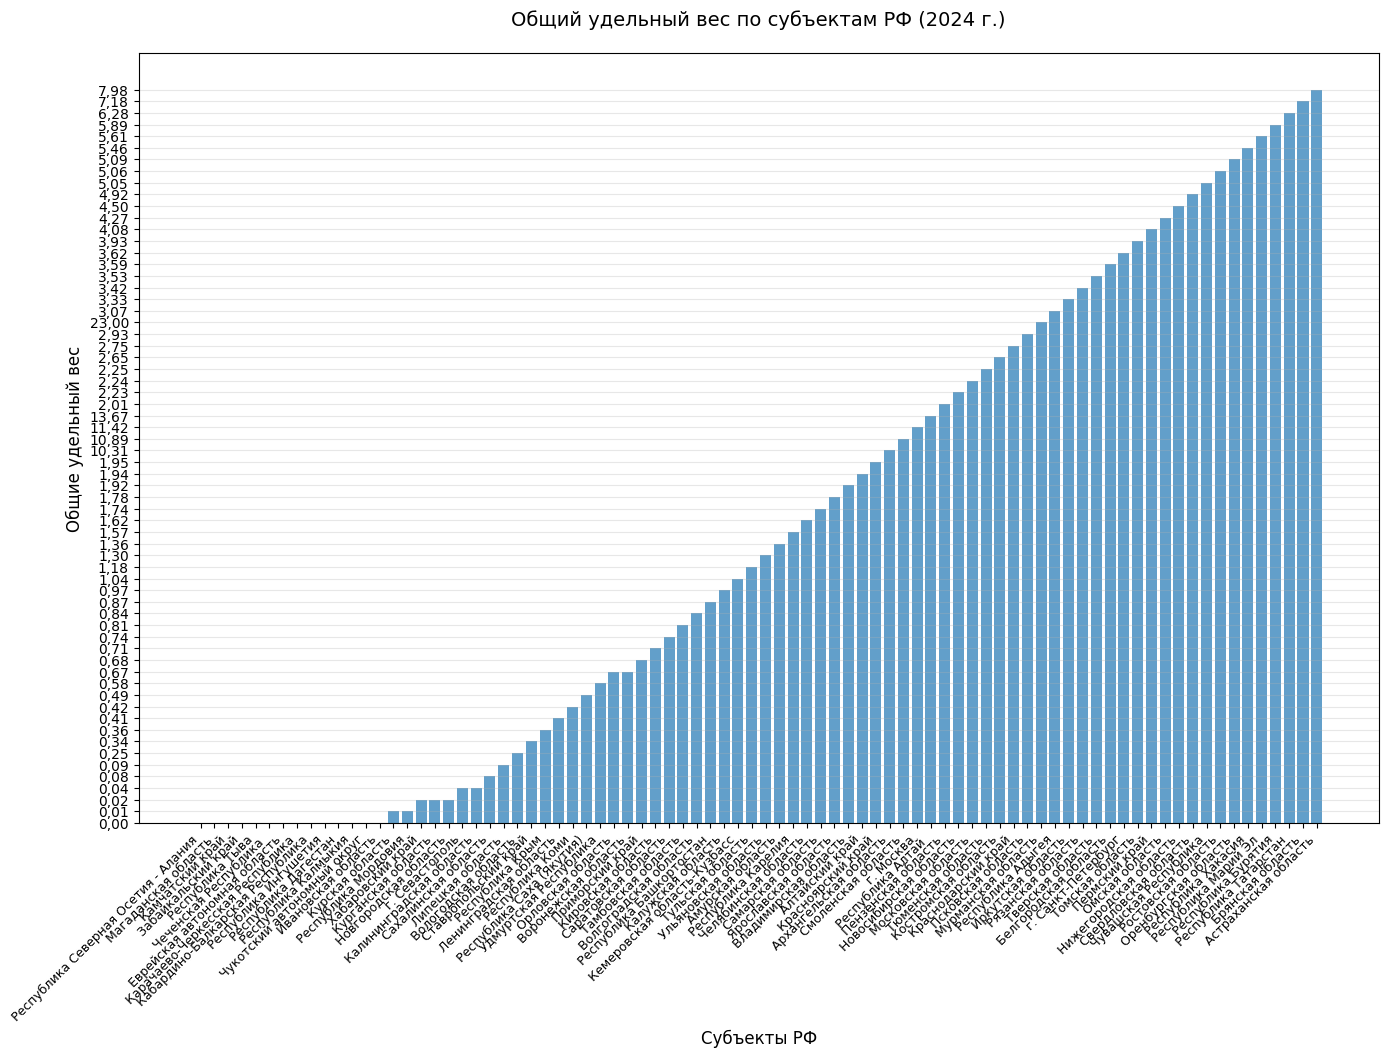

In [11]:
sorted_df = df.copy().sort_values('2024')

plt.figure(figsize=(16, 10))

bars = plt.bar(range(len(sorted_df)), sorted_df['2024'], alpha=0.7)

plt.xticks(range(len(sorted_df)), sorted_df['Name'], fontsize=9, rotation=45, ha='right')
plt.ylabel('Общие удельный вес', fontsize=12)
plt.xlabel('Субъекты РФ', fontsize=12)
plt.title('Общий удельный вес по субъектам РФ (2024 г.)', fontsize=14, pad=20)

plt.grid(axis='y', alpha=0.3)

plt.show()

In [13]:
values_2013 = np.array([float(x.replace(',', '.')) for x in df["2013"]])
values_2024 = np.array([float(x.replace(',', '.')) for x in df["2024"]])
data = {}

# 3.1 Среднее выборочное
data['mean'] = np.mean(values_2024)
data['avg'] = np.average(values_2024)

# 3.2 Выборочная дисперсия
data['var_biased'] = np.var(values_2024)          # смещённая
data['var_unbiased'] = np.var(values_2024, ddof=1)  # несмещённая

# 3.3 Среднеквадратичное отклонение
data['std'] = np.sqrt(data['var_unbiased'])

# 3.4 Медиана
data['median'] = np.median(values_2024)

# 3.5 Выборочное абсолютное отклонение от медианы
data['mad'] = np.mean(np.abs(values_2024 - data['median']))

# 3.6 Квартили
data['q1'] = np.percentile(values_2024, 25)
data['q2'] = np.percentile(values_2024, 50)  # медиана
data['q3'] = np.percentile(values_2024, 75)

# 3.7 Интерквартильная широта
data['iqr'] = data['q3'] - data['q1']

# 3.8 Полусумма выборочных квартилей
data['q_mid'] = (data['q1'] + data['q3']) / 2

# 3.9 Экстремальные элементы
data['min'] = np.min(values_2024)
data['max'] = np.max(values_2024)

# 3.10 Размах выборки
data['range'] = data['max'] - data['min']

# 3.11 Полусумма экстремальных элементов
data['mid_range'] = (data['min'] + data['max']) / 2

# 3.12 Выборочная оценка асимметрии
data['skewness'] = skew(values_2024)

# 3.13 Выборочная оценка эксцесса
data['kurtosis'] = kurtosis(values_2024)  # избыточный эксцесс (0 для нормального распределения)

print(f"3.1. Среднее выборочное: {data['mean']:.1f}")
print(f"3.2. Выборочная дисперсия:")
print(f"\t- Смещенная: {data['var_biased']:.1f}")
print(f"\t- Несмещенная: {data['var_unbiased']:.1f}")
print(f"3.3. Выборочное среднее квадратичное отклонение: {data['std']:.1f}")
print(f"3.4. Медиана: {data['median']:.1f}")
print(f"3.5. Выборочное абсолютное отклонение: {data['mad']:.1f}")
print(f"3.6. Квартили:")
print(f"\t- Q1 (25-й процентиль): {data['q1']:.1f}")
print(f"\t- Q2 (медиана): {data['q2']:.1f}")
print(f"\t- Q3 (75-й процентиль): {data['q3']:.1f}")
print(f"3.7. Интерквартильная широта: {data['iqr']:.1f}")
print(f"3.8. Полусумма выборочных квартилей: {data['q_mid']:.1f}")
print(f"3.9. Экстремальные элементы:")
print(f"\t- Минимум: {data['min']:.1f}")
print(f"\t- Максимум: {data['max']:.1f}")
print(f"3.10. Размах выборки: {data['range']:.1f}")
print(f"3.11. Полусумма экстремальных элементов: {data['mid_range']:.1f}")
print(f"3.12. Выборочная оценка асимметрии: {data['skewness']:.2f}")
print(f"3.13. Выборочная оценка эксцесса: {data['kurtosis']:.2f}")

3.1. Среднее выборочное: 2.6
3.2. Выборочная дисперсия:
	- Смещенная: 13.5
	- Несмещенная: 13.6
3.3. Выборочное среднее квадратичное отклонение: 3.7
3.4. Медиана: 1.2
3.5. Выборочное абсолютное отклонение: 2.3
3.6. Квартили:
	- Q1 (25-й процентиль): 0.1
	- Q2 (медиана): 1.2
	- Q3 (75-й процентиль): 3.6
3.7. Интерквартильная широта: 3.5
3.8. Полусумма выборочных квартилей: 1.8
3.9. Экстремальные элементы:
	- Минимум: 0.0
	- Максимум: 23.0
3.10. Размах выборки: 23.0
3.11. Полусумма экстремальных элементов: 11.5
3.12. Выборочная оценка асимметрии: 2.86
3.13. Выборочная оценка эксцесса: 10.94


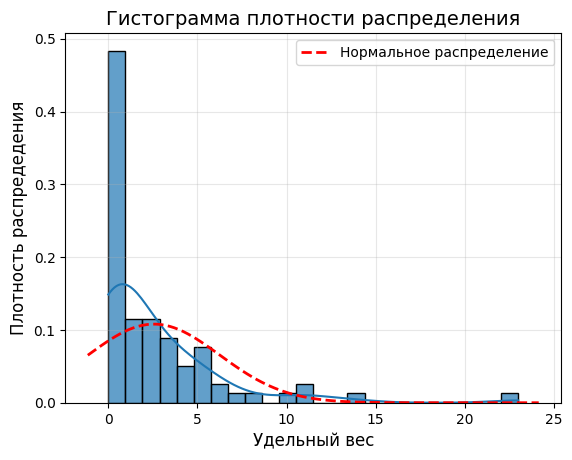

In [16]:
sns.histplot(values_2024, bins=24, kde=True, stat='density', alpha=0.7)
plt.xlabel('Удельный вес', fontsize=12)
plt.ylabel('Плотность распредедения', fontsize=12)
plt.title('Гистограмма плотности распределения', fontsize=14)
plt.grid(alpha=0.3)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, data['mean'], data['std'])
plt.plot(x, p, 'r--', linewidth=2, label='Нормальное распределение')

plt.legend()

ПАРАМЕТРИЧЕСКИЕ ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ (95%)
Среднее арифметическое:
Результат: [1.7; 3.4]

Медиана:
Результат: [0.7; 1.9]

Стандартное отклонение:
Результат: [3.2; 4.4]



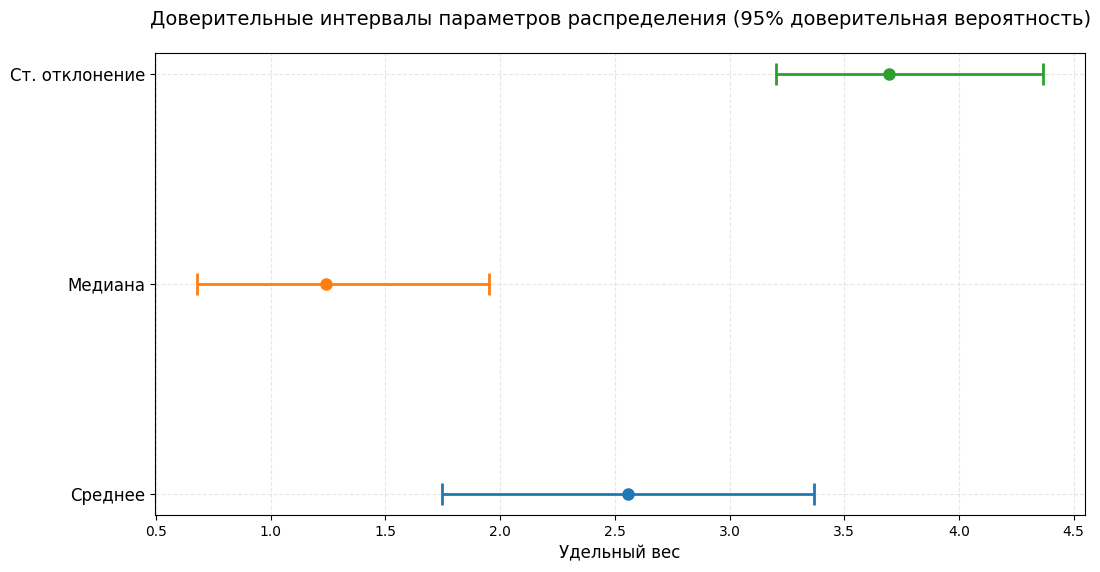

In [21]:
n = len(values_2024)
mean = np.mean(values_2024)
std = np.std(values_2024, ddof=1)
median = np.median(values_2024)
variance = np.var(values_2024, ddof=1)

print(f"ПАРАМЕТРИЧЕСКИЕ ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ (95%)")
t_critical = stats.t.ppf(0.975, n-1)
se_mean = std / np.sqrt(n)
ci_mean = [mean - t_critical * se_mean, mean + t_critical * se_mean]
print(f"Среднее арифметическое:")
print(f"Результат: [{ci_mean[0]:.1f}; {ci_mean[1]:.1f}]")

# 2. Доверительный интервал для медианы
k = int(np.floor((n - 1.96 * np.sqrt(n)) / 2))
if k < 0:
     k = 0
sorted_data = np.sort(values_2024)
ci_median = [sorted_data[k], sorted_data[n - k - 1]]
print(f"\nМедиана:")
print(f"Результат: [{ci_median[0]:.1f}; {ci_median[1]:.1f}]")

# 3. Доверительный интервал для стандартного отклонения
alpha = 1 - 0.95
chi2_lower = stats.chi2.ppf(1 - alpha/2, df=n-1)
chi2_upper = stats.chi2.ppf(alpha/2, df=n-1)
sigma_ci_lower = std * np.sqrt((n - 1) / chi2_lower)
sigma_ci_upper = std * np.sqrt((n - 1) / chi2_upper)
ci_std = [sigma_ci_lower, sigma_ci_upper]
print(f"\nСтандартное отклонение:")
print(f"Результат: [{sigma_ci_lower:.1f}; {sigma_ci_upper:.1f}]")
print()

fig, ax = plt.subplots(figsize=(12, 6))

parameters = ['Среднее', 'Медиана', 'Ст. отклонение']
intervals = [ci_mean, ci_median, ci_std]
point_estimates = [mean, median, std]

for i, (param, interval, point) in enumerate(zip(parameters, intervals, point_estimates)):
    # Расчет ошибок для отображения
    left_error = point - interval[0]
    right_error = interval[1] - point
    
    ax.errorbar(point, i, xerr=[[left_error], [right_error]],
                fmt='o', capsize=8, capthick=2, elinewidth=2,
                label=f'{param}', markersize=8)


ax.set_yticks(range(3))
ax.set_yticklabels(parameters, fontsize=12)
ax.set_xlabel('Удельный вес', fontsize=12)
ax.set_title('Доверительные интервалы параметров распределения (95% доверительная вероятность)', 
             fontsize=14, pad=20)
ax.grid(True, alpha=0.3, linestyle='--')


2013 год:
  Общая_сумма: 147.1
  Среднее: 1.8
  Медиана: 0.8
  Стандартное_отклонение: 2.4

2024 год:
  Общая_сумма: 209.8
  Среднее: 2.6
  Медиана: 1.2
  Стандартное_отклонение: 3.7


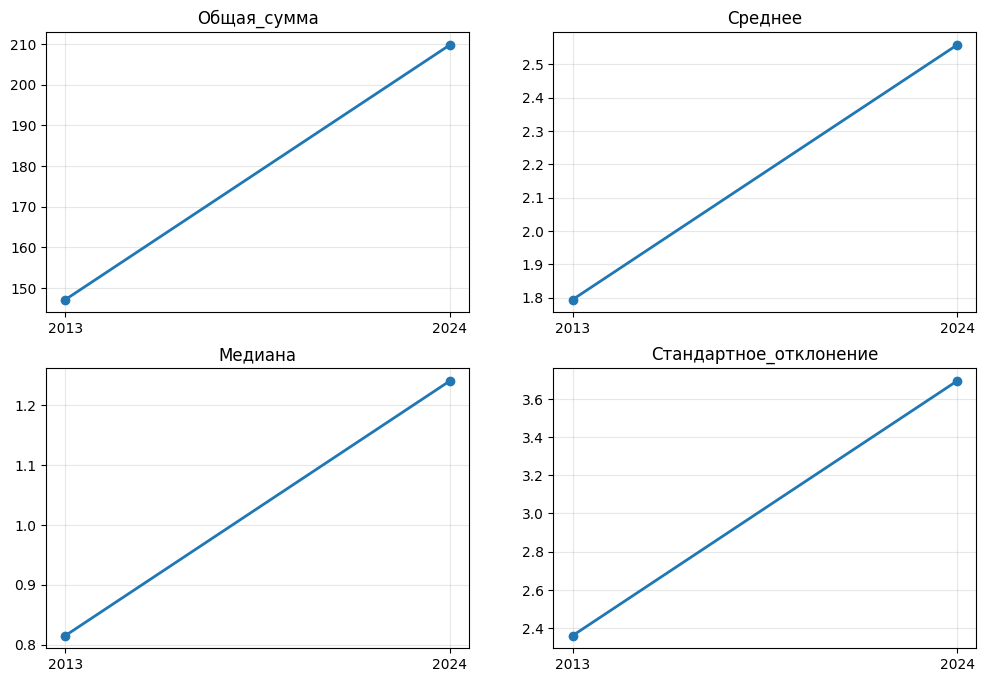

In [23]:
titles = ['Общая_сумма', 'Среднее', 'Медиана', 'Стандартное_отклонение']

def calculate_basic_stats(values, year_name):
    return {
        'Год': year_name,
        titles[0]: np.sum(values),
        titles[1]: np.mean(values),
        titles[2]: np.median(values),
        titles[3]: np.std(values, ddof=1)
    }

stats_2013 = calculate_basic_stats(values_2013, '2013')
stats_2024 = calculate_basic_stats(values_2024, '2024')
for stats in [stats_2013, stats_2024]:
    print(f"\n{stats['Год']} год:")
    print(f"  {titles[0]}: {stats[titles[0]]:_.1f}")
    print(f"  {titles[1]}: {stats[titles[1]]:_.1f}")
    print(f"  {titles[2]}: {stats[titles[2]]:_.1f}")
    print(f"  {titles[3]}: {stats[titles[3]]:_.1f}")

plt.figure(figsize=(12, 8))

for i, title in enumerate(titles, 1):
    plt.subplot(2, 2, i)
    values = [stats_2013[title], stats_2024[title]]
    plt.plot(['2013', '2024'], values, marker='o', linewidth=2)
    plt.title(title)
    plt.grid(True, alpha=0.3)

In [24]:
def gini_coefficient(x):
    mad = np.abs(np.subtract.outer(x, x)).mean()
    rmad = mad/np.mean(x)
    g = 0.5 * rmad
    return g

std = np.std(values_2024, ddof=1)
mean = np.mean(values_2024)
me = np.median(values_2024)

cv = (std / mean) * 100
pearson_asym = 3 * (mean - me) / std
gini_main = gini_coefficient(values_2024)
print(f"Коэффициент Джини: {gini_main:.3f}")
print(f"Коэффициент вариации: {cv:.3f}")
print(f"Коэффициент асимметрии Пирсона: {pearson_asym:.3f}")

Коэффициент Джини: 0.643
Коэффициент вариации: 144.413
Коэффициент асимметрии Пирсона: 1.070
